In [19]:
import numpy as np # for array operations and for mean absolute relative error
import pandas as pd # for working with DataFrames
import matplotlib.pyplot as plt

##### Reading the data

In [20]:
df = pd.read_csv('porocal.csv')
df.head()

,Depth,GR,NPHI,RES,PHIF
0,3666.5916,54.521200,0.347343,0.021643,19.9843
1,3666.8964,54.368690,0.372180,0.021642,24.2380
2,3667.0488,54.292435,0.475308,0.021641,22.6408
3,3667.2012,54.216180,0.423369,0.021640,21.6169
4,3667.3536,54.139925,0.408307,0.021640,17.8107


In [21]:
x = df.drop('PHIF', axis = 1) # Features
y = df['PHIF']  # Target

##### Data distribution check

array([[<AxesSubplot:title={'center':'Depth'}>,
        <AxesSubplot:title={'center':'GR'}>],
       [<AxesSubplot:title={'center':'NPHI'}>,
        <AxesSubplot:title={'center':'RES'}>]], dtype=object)

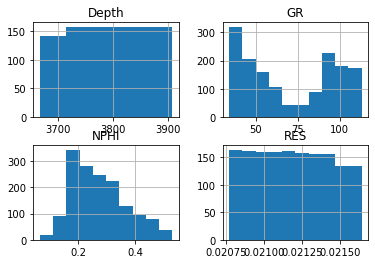

In [22]:
df.hist(column=['Depth', 'GR', 'NPHI', 'RES'])

(3660.0, 3920.0)

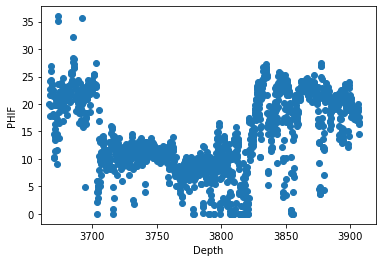

In [23]:
plt.scatter(x['Depth'], y)
plt.xlabel('Depth')
plt.ylabel('PHIF')
plt.xlim(3660, 3920)
plt.xlim(3660, 3920)
#plt.plot([0,30], [0,30], 'black')

(35.0, 113.0)

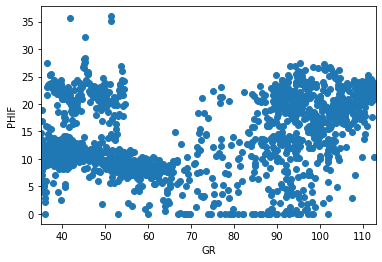

In [24]:
plt.scatter(x['GR'], y)
plt.xlabel('GR')
plt.ylabel('PHIF')
plt.xlim(35, 113)
plt.xlim(35, 113)

(0.06, 0.6)

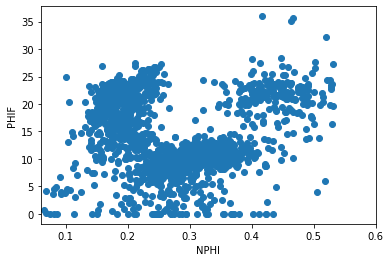

In [25]:
plt.scatter(x['NPHI'], y)
plt.xlabel('NPHI')
plt.ylabel('PHIF')
plt.xlim(0.06, 0.6)
plt.xlim(0.06, 0.6)
#plt.plot([0,30], [0,30], 'black')

(0.0207, 0.0217)

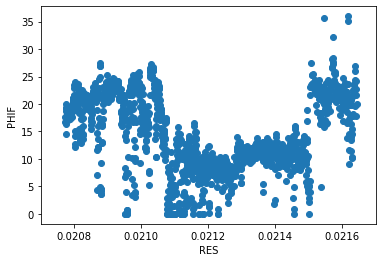

In [26]:
plt.scatter(x['RES'], y)
plt.xlabel('RES')
plt.ylabel('PHIF')
plt.xlim(0.0207, 0.0217)
plt.xlim(0.0207, 0.0217)
#plt.plot([0,30], [0,30], 'black')

##### Model development

In [27]:
from sklearn import datasets, ensemble
from datetime import datetime
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor 
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn import metrics 

In [28]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)

In [29]:
rfr = RandomForestRegressor(random_state = 42)

###### Hyperparameter tuning

In [30]:
param_grid = { 
    'n_estimators':np.arange(1,10,1),
    'max_features':np.arange(0.1,1,0.1),
    'min_samples_leaf':np.arange(1,20,1)
}

In [31]:
start_time = datetime.now() #time measurement begins

CV_rfr = GridSearchCV(estimator=rfr, param_grid=param_grid, cv= 5)
CV_rfr.fit(x_train, y_train)

end_time = datetime.now() #time measurement ends

In [32]:
CV_rfr.best_params_

{'max_features': 0.1, 'min_samples_leaf': 1, 'n_estimators': 9}

In [33]:
print('Run Time: {}'.format(end_time - start_time))

Run Time: 0:00:56.221620


In [34]:
df_grid_search = pd.DataFrame(CV_rfr.cv_results_)
df_grid_search = df_grid_search.sort_values("rank_test_score")
df_grid_search.to_csv("cv_results.csv")

In [35]:
rfr1=RandomForestRegressor(random_state=42, min_samples_leaf=CV_rfr.best_params_["min_samples_leaf"], 
                           min_samples_leaf=CV_rfr.best_params_["min_samples_leaf"] 
                           n_estimators=CV_rfr.best_params_["n_estimators"])

In [36]:
rfr1.fit(x_train, y_train)

RandomForestRegressor(n_estimators=9, random_state=42)

In [37]:
y_val_pred = rfr1.predict(x_val)

##### Model evaluation

In [38]:
corr_matrix = np.corrcoef(y_val, y_val_pred)
corr = corr_matrix[0,1]
r21 = corr**2
print("R2 of Validation Model =", r21)

R2 of Validation Model = 0.8054377254677338


In [39]:
mse1 = metrics.mean_squared_error(y_val, y_val_pred)
print("Mean Square Error of Validation Model =", mse1)

Mean Square Error of Validation Model = 8.954650432598172


In [40]:
mse1 = metrics.mean_squared_error(y_val, y_val_pred)
rmse1 = mse1**0.5
print("Root Mean Square Error of Validation Model =", rmse1)

Root Mean Square Error of Validation Model = 2.992432193483784


In [41]:
mae1 = metrics.mean_absolute_error(y_val, y_val_pred)
mae1
print("Mean Absolute Error of Validation Model =", mae1)

Mean Absolute Error of Validation Model = 1.9825521146953407


In [42]:
theta = np.polyfit(y_val, y_val_pred, 1)
print(f'The parameters of the line: {theta}')
y_line = theta[1] + theta[0] * y_val #best fit line

The parameters of the line: [0.85958911 2.13520139]


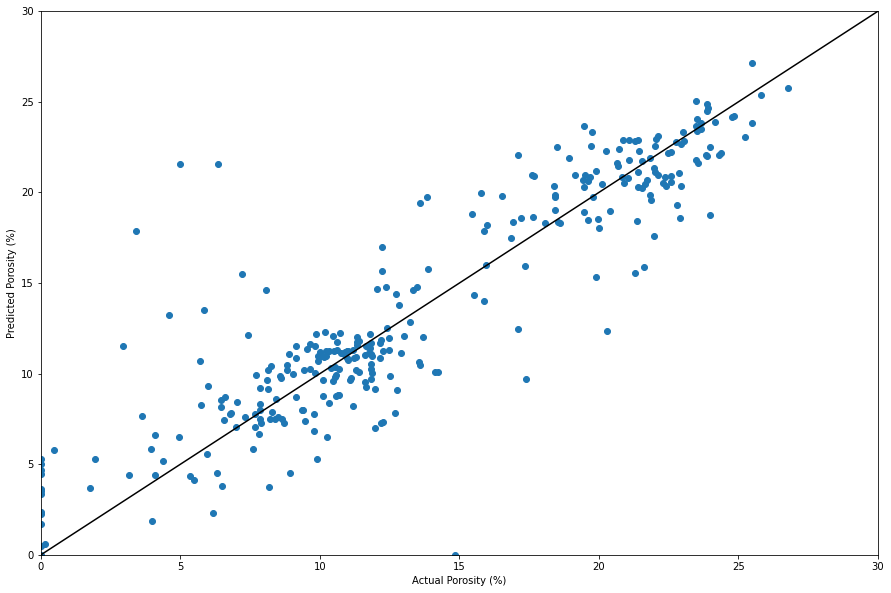

In [43]:
fig = plt.figure(figsize=(15, 10))
plt.scatter(y_val, y_val_pred)
plt.xlabel('Actual Porosity (%)')
plt.ylabel('Predicted Porosity (%)')
plt.xlim(0, 30)
plt.ylim(0, 30)
plt.plot([0,30], [0,30], 'black')

In [44]:
y_val_sort = y_val.sort_index(axis = 0) #Sorting y_test based on index number

In [45]:
y_val.sort_index(axis = 0).index #extracting indices of y_test values

Int64Index([  15,   23,   29,   30,   32,   43,   44,   49,   51,   56,
            ...
            1480, 1490, 1497, 1498, 1500, 1507, 1512, 1516, 1536, 1541],
           dtype='int64', length=310)

In [46]:
df_val_depth = df['Depth'].iloc[y_val.sort_index(axis = 0).index]

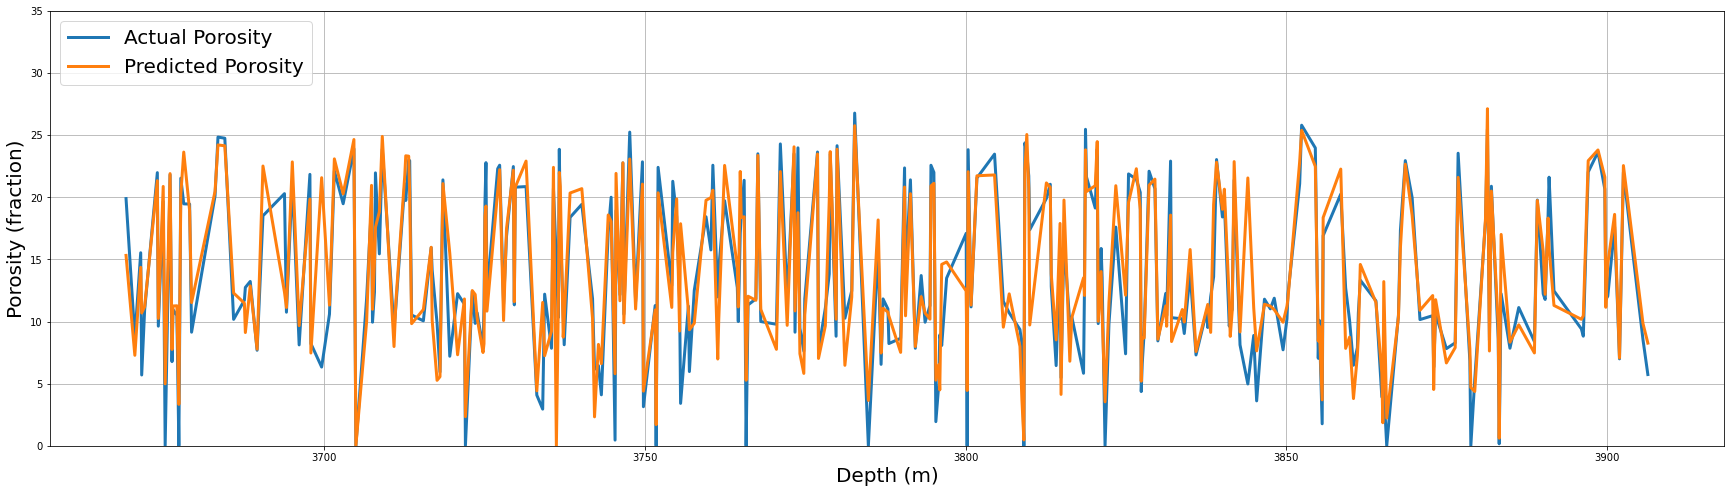

In [47]:
plt.figure(figsize=(30,8))
plt.xlabel('Depth (m)', fontsize=20)
plt.ylabel('Porosity (fraction)', fontsize=20)
plt.plot(df_val_depth, y_val, label = 'Actual Porosity', linewidth=3)
plt.plot(df_val_depth, y_val_pred, label = 'Predicted Porosity', linewidth=3)
plt.legend(loc="upper left", fontsize=20)
plt.ylim(0, 35)
plt.grid()

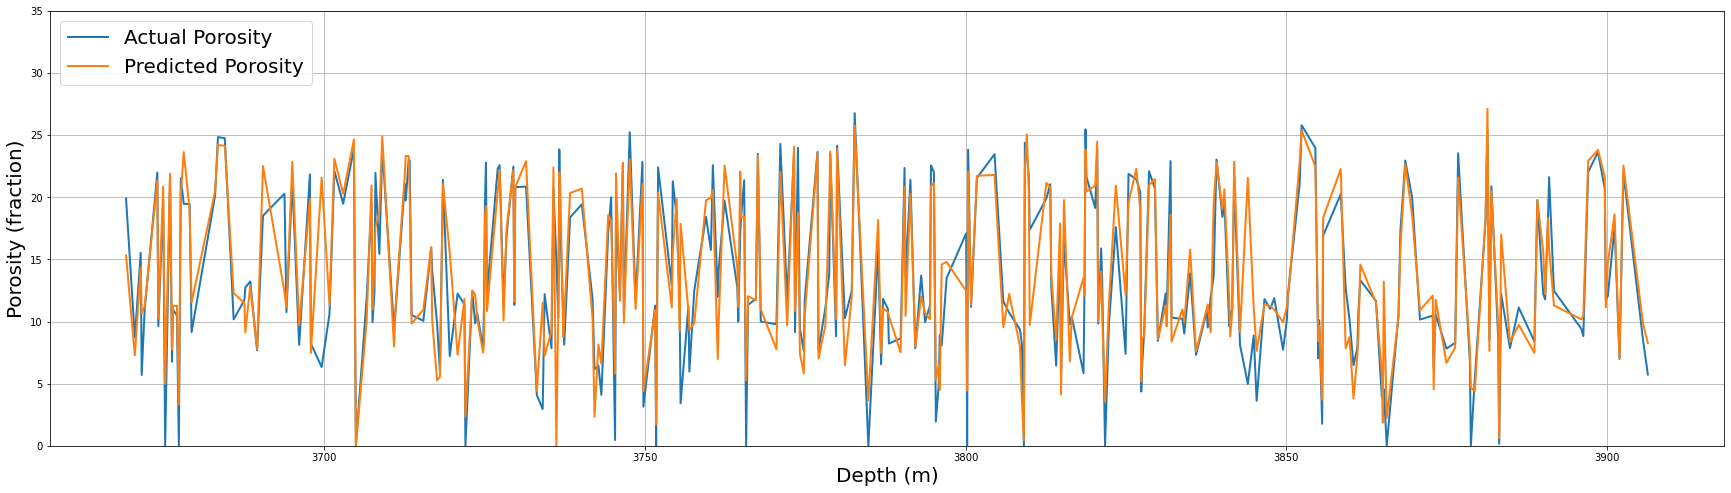

In [48]:
plt.figure(figsize=(30,8))
plt.xlabel('Depth (m)', fontsize=20)
plt.ylabel('Porosity (fraction)', fontsize=20)
plt.plot(df_val_depth, y_val, label = 'Actual Porosity', linewidth=2)
plt.plot(df_val_depth, y_val_pred, label = 'Predicted Porosity', linewidth=2)
plt.legend(loc="upper left", fontsize=20)
plt.ylim(0, 35)
plt.grid()

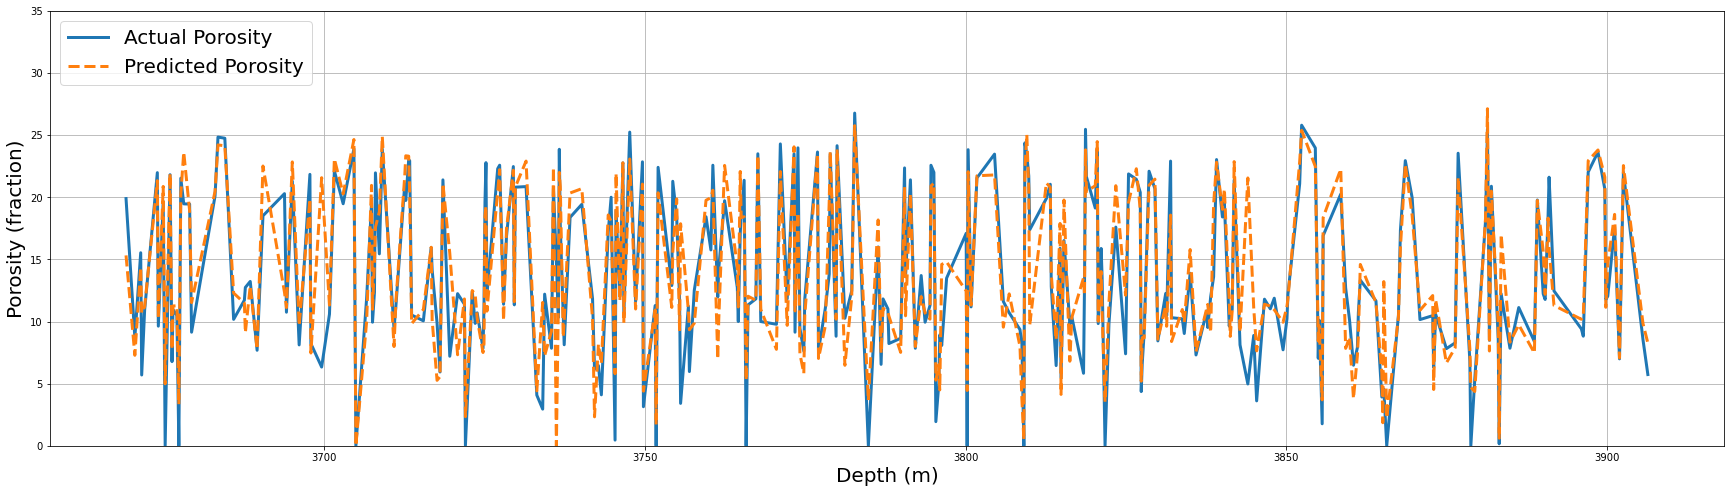

In [49]:
plt.figure(figsize=(30,8))
plt.xlabel('Depth (m)', fontsize=20)
plt.ylabel('Porosity (fraction)', fontsize=20)
plt.plot(df_val_depth, y_val, label = 'Actual Porosity', linewidth=3)
plt.plot(df_val_depth, y_val_pred, label = 'Predicted Porosity', linewidth=3, linestyle = 'dashed')
plt.legend(loc="upper left", fontsize=20)
plt.ylim(0, 35)
plt.grid()